In [1]:
import neighborhood_profiles_checks
import pandas as pd
import os
import numpy as np
import PlottingTools

df = pd.read_csv(os.path.join('.', 'input','Combo_CSVfiles_20230327_152849.csv'))
umap_x_colname = 'UMAP_1_20230327_152849'
umap_y_colname = 'UMAP_2_20230327_152849'

num_cells_from_each_sample = int(round(df.groupby('ShortName').size().min() * 0.1, -3))

indices = df.groupby('ShortName').apply(lambda x: x.sample(n=num_cells_from_each_sample, replace=False).index, include_groups=False).explode().values

df['umap_test'] = False

df.loc[indices, 'umap_test'] = True

edges_x = np.linspace(df[umap_x_colname].min(), df[umap_x_colname].max(), 201)
edges_y = np.linspace(df[umap_y_colname].min(), df[umap_y_colname].max(), 201)
df_test = df[df['umap_test']]
df_alive = df_test[df_test['Survival_5yr'] == 1]
df_dead = df_test[df_test['Survival_5yr'] == 0]

d_alive = PlottingTools.plot_2d_density(df_alive[umap_x_colname], df_alive[umap_y_colname], bins=[edges_x, edges_y], return_matrix=True)
d_dead = PlottingTools.plot_2d_density(df_dead[umap_x_colname], df_dead[umap_y_colname], bins=[edges_x, edges_y], return_matrix=True)
import matplotlib.pyplot as plt

cmap_bwr = plt.get_cmap('bwr').copy()

d_diff = d_alive - d_dead

cutoff = np.abs(d_diff).max() * 0.2

d_diff[d_diff > cutoff] = 1
d_diff[d_diff < -cutoff] = -1
d_diff[(d_diff >= -cutoff) & (d_diff <= cutoff)] = 0

PlottingTools.plot_2d_density(d_diff, bins=[edges_x, edges_y], n_pad=30, circle_type='arch', cmap=cmap_bwr)
clusters = {0: [tuple(x) for x in np.transpose(np.where(d_diff == -1))], 1: [tuple(x) for x in np.transpose(np.where(d_diff == 1))]}
import importlib
importlib.reload(neighborhood_profiles_checks)

df_test = neighborhood_profiles_checks.get_subset_df_with_bins(df, edges_x, edges_y, pd.Series(True, index=df.index), spatial_x_colname='CentroidX', spatial_y_colname='CentroidY', umap_x_colname=umap_x_colname, umap_y_colname=umap_y_colname, property_colnames=['XMin', 'XMax', 'YMin', 'YMax'])

df_test
import importlib
importlib.reload(neighborhood_profiles_checks)

fig_property_means_by_bin, fig_property_means_by_cell, fig_umap_by_bin, fig_spatial_by_bin, fig_umap_by_cell, fig_spatial_by_cell = neighborhood_profiles_checks.run_checks(df_test, clusters, spatial_x_colname='CentroidX', spatial_y_colname='CentroidY', umap_x_colname=umap_x_colname, umap_y_colname=umap_y_colname, property_colnames=['XMin', 'XMax', 'YMin', 'YMax'], min_cells_per_bin=5)

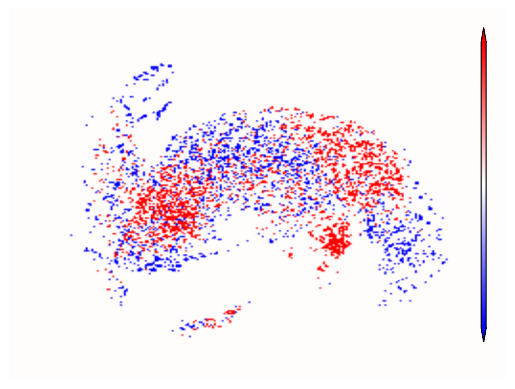

In [44]:
PlottingTools.plot_2d_density(d_diff, bins=[edges_x, edges_y], n_pad=30, circle_type='arch', cmap=cmap_bwr)